In [18]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [19]:
def showImage(image):
    plt.imshow(image)


def originalImageOpen(PATH):
    image = Image.open(PATH)
    plt.imshow(image)


def imOpen(PATH):
    originalImage = Image.open(PATH)
    image = originalImage.copy()
    for i in range(0, image.size[0]):
        for j in range(0, image.size[1]):
            r, g, b = image.getpixel((i, j))
            grayPixel = (0.3 * r) + (0.59 * g) + (0.11 * b)
            grayPixel = int(grayPixel)
            image.putpixel((i, j), (grayPixel, grayPixel, grayPixel))
    return image


def toStrH(image):
    rowWiseRunLengthCode = "H" + " " + \
        str(image.size[0]) + " " + str(image.size[1])
    firstTime = True
    iOut = ""
    for j in range(0, image.size[1]):
        rowWiseRunLengthCode = rowWiseRunLengthCode + str(iOut) + "\n"
        firstTime = True
        for i in range(0, image.size[0]-1):
            iOut = str(i)
            if(firstTime):
                firstTime = False
                newr, newg, newb = image.getpixel((i, j))
                r, g, b = newr, newg, newb
                rowWiseRunLengthCode = rowWiseRunLengthCode + \
                    str(r) + " " + str(i) + " "
            else:
                newr, newg, newb = image.getpixel((i, j))
                if(newr != r):
                    r, g, b = newr, newg, newb
                    rowWiseRunLengthCode = rowWiseRunLengthCode + \
                        str(i-1) + " " + str(r) + " " + str(i) + " "
    rowWiseRunLengthCode = rowWiseRunLengthCode + str(iOut)
    return rowWiseRunLengthCode


def toStrV(image):
    rowWiseRunLengthCode = "V" + " " + \
        str(image.size[0]) + " " + str(image.size[1])
    firstTime = True
    jOut = ""
    for i in range(0, image.size[0]):
        rowWiseRunLengthCode = rowWiseRunLengthCode + str(jOut) + "\n"
        firstTime = True
        for j in range(0, image.size[1]-1):
            jOut = str(j)
            if(firstTime):
                firstTime = False
                newr, newg, newb = image.getpixel((i, j))
                r, g, b = newr, newg, newb
                rowWiseRunLengthCode = rowWiseRunLengthCode + \
                    str(r) + " " + str(j) + " "
            else:
                newr, newg, newb = image.getpixel((i, j))
                if(newr != r):
                    r, g, b = newr, newg, newb
                    rowWiseRunLengthCode = rowWiseRunLengthCode + \
                        str(j-1) + " " + str(j) + " " + str(j) + " "
    rowWiseRunLengthCode = rowWiseRunLengthCode + str(jOut)
    return rowWiseRunLengthCode


def toFile(name, runLengthCode):
    path = 'F:/GUC/Computer Vision/' + name
    file = open(path, 'w+')
    file.write(runLengthCode)
    file.close()


def toImg(path):
    file = open(path, 'r')
    lines = file.readlines()
    values = lines[0].split()
    image = Image.new('RGB', (int(values[1]), int(values[2])))
    rltype = ""
    firstLine = True
    index = 0
    for j in lines:
        values = lines[index].split()
        if(lines[0][0] == 'H'and (firstLine)):
            rltype = 'H'
        if(lines[0][0] == 'V'and (firstLine)):
            rltype = 'V'
        if(rltype == 'H' and not(firstLine)):
            i = 0
            while i < (len(values)-3):
                color = values[i]
                start = values[i+1]
                end = values[i+2]
                color = int(color)
                start = int(start)
                end = int(end)
                while start < (end+1):
                    image.putpixel((start, index-1), (color, color, color))
                    start = start + 1
                i = i+3
        if(rltype == 'V' and not(firstLine)):
            i = 0
            while i < (len(values)/3):
                color = values[i]
                start = values[i+1]
                end = values[i+2]
                while start < (end+1):
                    image.putpixel((index-1, start), (color, color, color))
                    start = start + 1
                i = i+3
        index = index + 1
        firstLine = False
    return image

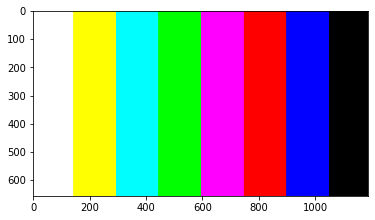

In [20]:
originalImageOpen('F:/GUC/Computer Vision/bars.bmp')

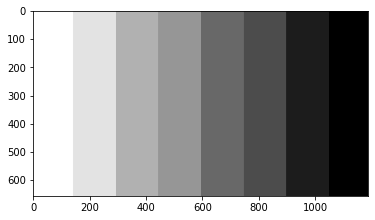

In [21]:
greyScaleImage = imOpen('F:/GUC/Computer Vision/bars.bmp')
showImage(greyScaleImage)

In [22]:
rowWiseRunLengthCode = toStrH(greyScaleImage)

In [23]:
columnWiseRunLengthCode = toStrV(greyScaleImage)

In [24]:
print(rowWiseRunLengthCode)

H 1188 656
255 0 139 254 140 141 251 142 142 228 143 143 226 144 145 227 146 290 226 291 292 222 293 293 180 294 294 178 295 295 177 296 443 175 444 444 152 445 445 151 446 446 150 447 593 151 594 594 160 595 595 94 596 596 104 597 745 101 746 746 80 747 747 77 748 748 76 749 895 77 896 896 75 897 897 33 898 898 29 899 899 28 900 1047 26 1048 1048 4 1049 1049 0 1050 1186
255 0 139 254 140 141 251 142 142 228 143 143 226 144 145 227 146 290 226 291 292 222 293 293 180 294 294 178 295 295 177 296 443 175 444 444 152 445 445 151 446 446 150 447 593 151 594 594 160 595 595 94 596 596 104 597 745 101 746 746 80 747 747 77 748 748 76 749 895 77 896 896 75 897 897 33 898 898 29 899 899 28 900 1047 26 1048 1048 4 1049 1049 0 1050 1186
255 0 139 254 140 141 251 142 142 228 143 143 226 144 145 227 146 290 226 291 292 222 293 293 180 294 294 178 295 295 177 296 443 175 444 444 152 445 445 151 446 446 150 447 593 151 594 594 160 595 595 94 596 596 104 597 745 101 746 746 80 747 747 77 748 748 76 7

In [25]:
print(columnWiseRunLengthCode)

V 1188 656
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654
255 0 654

In [26]:
toFile("rowWiseRunLengthCode.txt", rowWiseRunLengthCode)
toFile("columnWiseRunLengthCode.txt", columnWiseRunLengthCode)

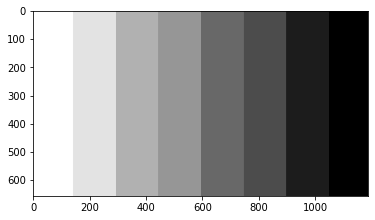

In [27]:
showImage(greyScaleImage)

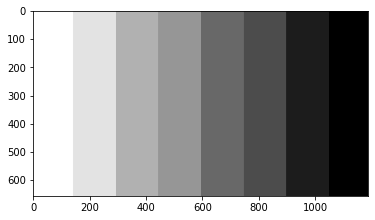

In [29]:
image = toImg("F:/GUC/Computer Vision/rowWiseRunLengthCode.txt")
showImage(image)